# Figure

In [1]:
%matplotlib inline
# %config InlineBackend.figure_format='svg'

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from mpl_toolkits.mplot3d.axes3d import Axes3D

In [3]:
import numpy as np

In [4]:
fig = plt.figure(figsize=(8, 2.5), facecolor="#f1f1f1")

<Figure size 576x180 with 0 Axes>

# Axes

## axes coordinates as fractions of the canvas width and height

In [5]:
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8

ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")

### prepare linspace

In [6]:
x = np.linspace(-2, 2, 1000)

$y_1 = \cos({40 \cdot x})$

In [7]:
y1 = np.cos(40 * x)

$y_2 = e^{-x^2}$

In [8]:
y2 = np.exp(-x**2)

In [9]:
def prepare_plot(ax, hide_info=False):
    # Hide axis data
    if (hide_info):
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Prepare plot
    ax.plot(x, y1 * y2)
    ax.plot(x, y2, 'g')
    ax.plot(x, -y2, 'g')
    pass

### Save figure to file

In [10]:
prepare_plot(ax)
fig.savefig("graph.png", dpi=100, facecolor="#f1f1f1")

### Let's draw the plot instead of output to a file

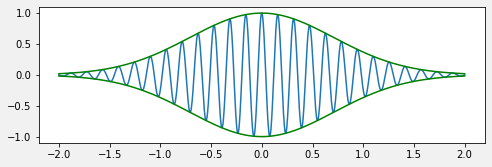

In [11]:
fig, ax = plt.subplots(figsize=(8, 2.5), facecolor="#f1f1f1")

# Run to prepare plot
prepare_plot(ax)

### For example, to generate a grid of Axes instances in a newly created Figure object, with three rows and two columns, we can use

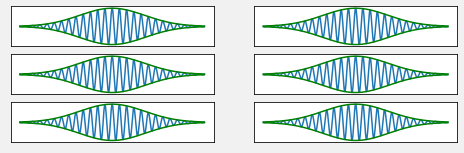

In [12]:
fig, axes = plt.subplots(figsize=(8, 2.5), facecolor="#f1f1f1", nrows=3, ncols=2)

# Prepare plot per every axe
for i, rows in enumerate(axes):
    for j, axe in enumerate(rows):
        prepare_plot(axe, True)

### Plt hide axis values example

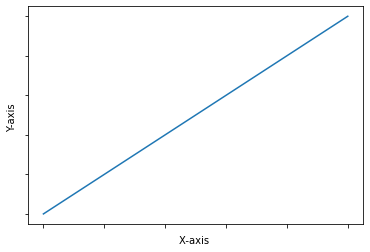

In [13]:
plt.plot([0, 5], [0, 5])

plt.ylabel("Y-axis ")
plt.xlabel("X-axis ")

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

plt.show()

# Plot Types

> Effective scientific and technical visualization of data requires a wide variety of graphing
techniques. Matplotlib implements many types of plotting techniques as methods of
the Axes object. For example, in the previous examples, we have already used the plot
method, which draws curves in the coordinate system provided by the Axes object.

> For details, see the docstrings for each method shown in Figure 4-6,
using, for example, help(plt.Axes.bar)

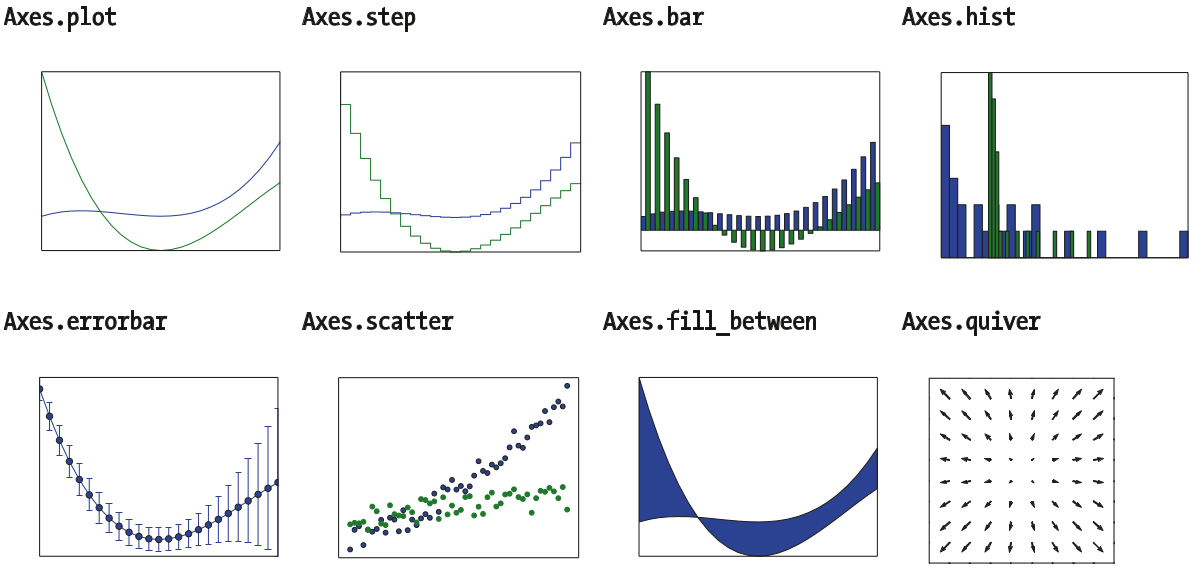

### Bar example

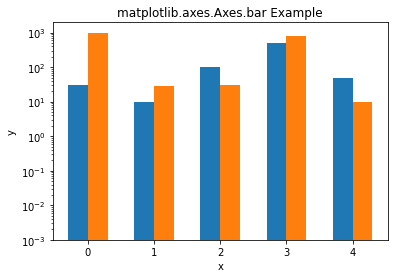

In [14]:
data = ((30, 1000), (10, 28), (100, 30),
        (500, 800), (50, 10))
  
dim = len(data[0])
w = 0.6
dimw = w / dim
  
fig, ax = plt.subplots()

x = np.arange(len(data))
for i in range(len(data[0])):
    y = [d[i] for d in data]
    b = ax.bar(x + i * dimw, y, 
               dimw, 
               bottom = 0.001)
  
ax.set_xticks(x + dimw / 2)
ax.set_xticklabels(map(str, x))
ax.set_yscale('log')
  
ax.set_xlabel('x')
ax.set_ylabel('y')
  
ax.set_title('matplotlib.axes.Axes.bar Example')
  
plt.show()

### Bar example 2

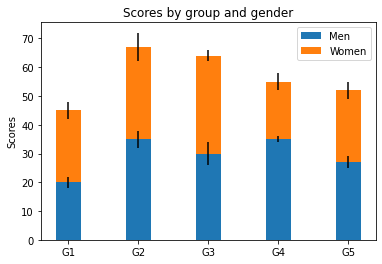

In [15]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means, label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

### Bar chart on polar axis

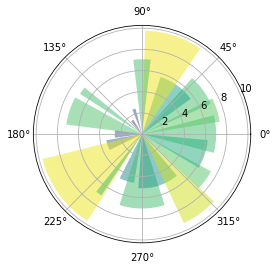

In [16]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

## Line Properties

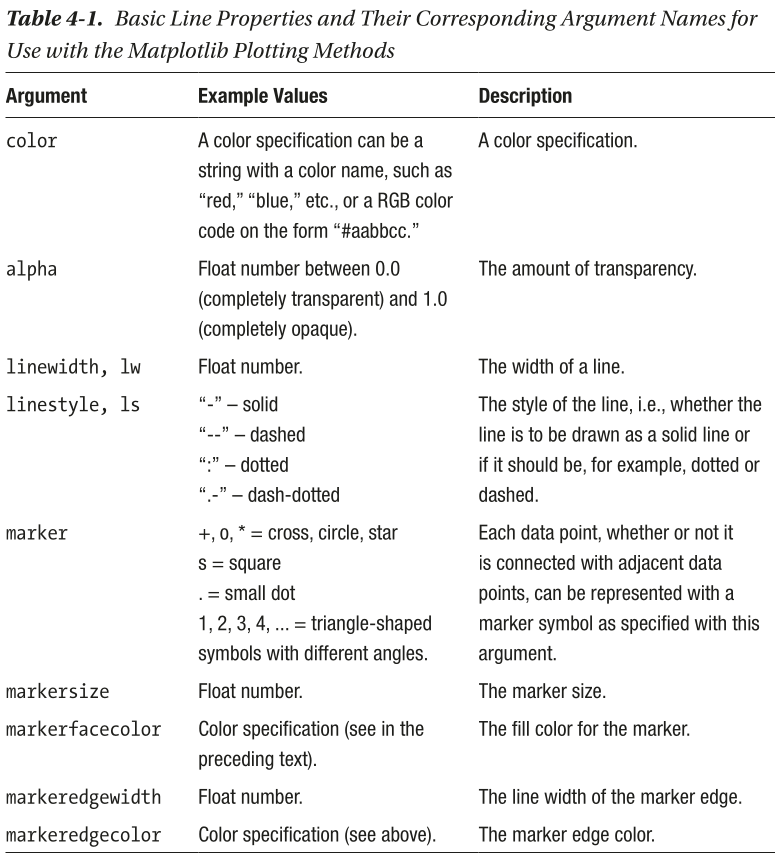

> To illustrate the use of these properties and arguments, consider the following code,
which draws horizontal lines with various values of the line width, line style, marker
symbol, color, and size. The resulting graph is shown in Figure 4-7.

### Prepare space for the plot

In [17]:
x = np.linspace(-5, 5, 5)
y = np.ones_like(x)

### Axes_settings function

In [18]:
def axes_settings(fig, ax, title, ymax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0, ymax+1)
    ax.set_title(title)

## Example of different lines type

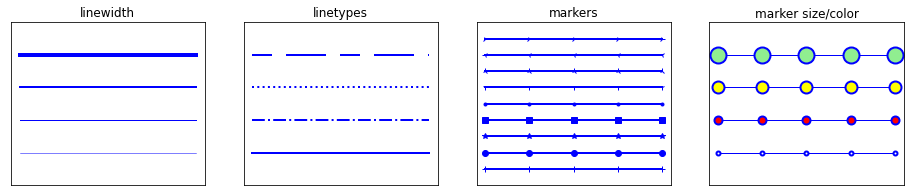

In [19]:
fig, axes = plt.subplots(1, 4, figsize=(16,3))

# Line width settings

linewidths = [0.5, 1.0, 2.0, 4.0]

for n, linewidth in enumerate(linewidths):
    axes[0].plot(x, y + n, color="blue", linewidth=linewidth)
    
axes_settings(fig, axes[0], "linewidth", len(linewidths))


# Line style settings

linestyles = ['-', '-.', ':']

for n, linestyle in enumerate(linestyles):
    axes[1].plot(x, y + n, color="blue", lw=2, linestyle=linestyle)
    
# custom dash style
line, = axes[1].plot(x, y + 3, color="blue", lw=2)
length1, gap1, length2, gap2 = 10, 7, 20, 7
line.set_dashes([length1, gap1, length2, gap2])
axes_settings(fig, axes[1], "linetypes", len(linestyles) + 1)

# marker types

markers = ['+', 'o', '*', 's', '.', '1', '2', '3', '4']

for n, marker in enumerate(markers):
    axes[2].plot(x, y + n, color="blue", lw=2, ls='-', marker=marker)
    axes_settings(fig, axes[2], "markers", len(markers))
    
axes_settings(fig, axes[2], "markers", len(markers))

# marker size and color
markersizecolors = [(4, "white"), (8, "red"), (12, "yellow"), (16, "lightgreen")]

for n, (markersize, markerfacecolor) in enumerate(markersizecolors):
    axes[3].plot(x, y + n, color="blue", lw=1, ls='-', marker='o', markersize=markersize, markerfacecolor=markerfacecolor, markeredgewidth=2)
    
axes_settings(fig, axes[3], "marker size/color", len(markersizecolors))